### 1. Project Background
In this project, I will use a clustering algorithm to perform customer segmentation on a dataset. Customer segmentation is a common technique used in marketing to divide customers into groups based on similar characteristics, such as purchasing behavior or demographics. By segmenting customers, businesses can gain valuable insights to tailor their marketing strategies, product offerings, and customer service.

#### About the data:
The data contain the online purchase history of 2400 retail customers.

Data Source: Kaggle
Link: https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset

### 2. Load Data and Libraries


In [1]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine Learning Models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Machine Learning Model Evaluation Methods 
from sklearn.metrics import mean_squared_error

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
#pip install openpyxl

In [3]:
data=pd.read_excel('Online_Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 3. Data Preprocesssing


For this project I will be segmenting the customers based on the quantity and unit price.

In [4]:
#create new df with target featuers
df=data[['Quantity','UnitPrice']]
df.head()

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


#### 3.3 Feature Scaling

In [5]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)


### 4. Clustering with K-means

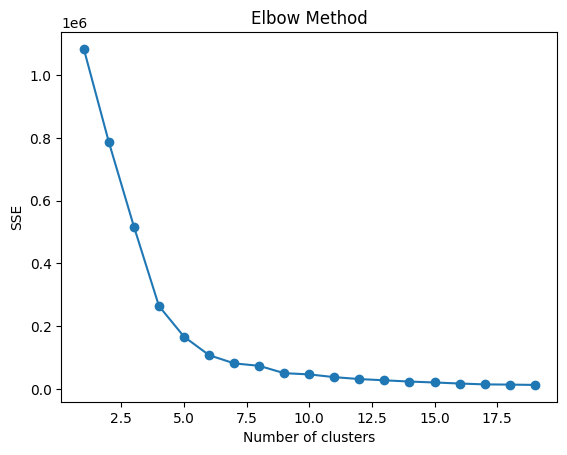

In [7]:
sse = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)


# Plot the sse for each number of clusters
plt.plot(range(1, 20), sse, marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title("Elbow Method")
plt.show()

In [8]:
# Apply the kmeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters_kmeans = kmeans.fit_predict(scaled_df)

# Add cluster labels to the original dataframe
df['cluster_KMeans'] = clusters_kmeans

In [9]:
df.head()

,Quantity,UnitPrice,cluster_KMeans
0,6,2.55,0
1,6,3.39,0
2,8,2.75,0
3,6,3.39,0
4,6,3.39,0


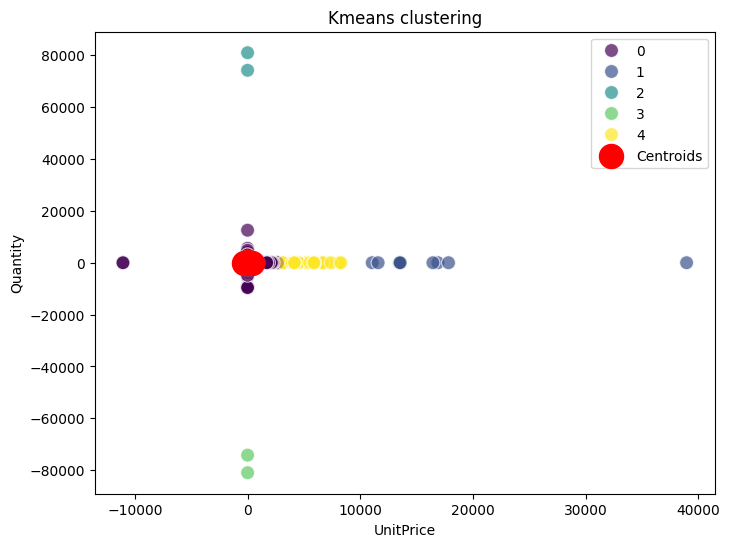

In [15]:
# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(y = 'Quantity', x = 'UnitPrice', hue = 'cluster_KMeans', data = df, palette = 'viridis', s = 100, alpha = 0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Kmeans clustering')
plt.legend()
plt.show()

Insights from Kmean clustering
1. Even after dropping all non-numerical columns, the plots is not showing proper clusters. Try other methods


### 5. Clustering with GMM

In [12]:
#import libraries
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=5,random_state=42)
gmm.fit(df)
labels = gmm.predict(df)

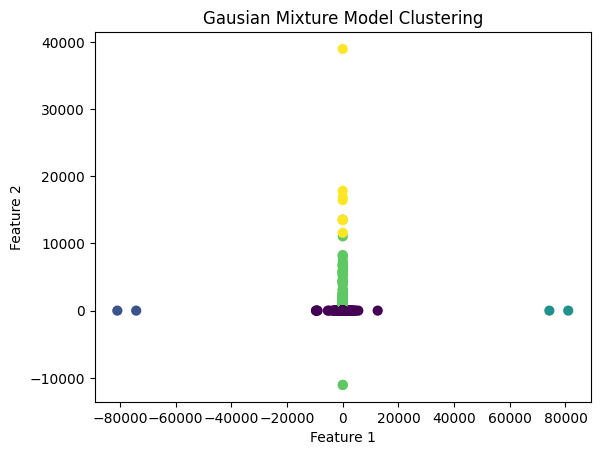

In [14]:
# Plot the data with the cluster assignments
plt.scatter(df['Quantity'], df['UnitPrice'], c=labels, s=40, cmap='viridis')
plt.title("Gausian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

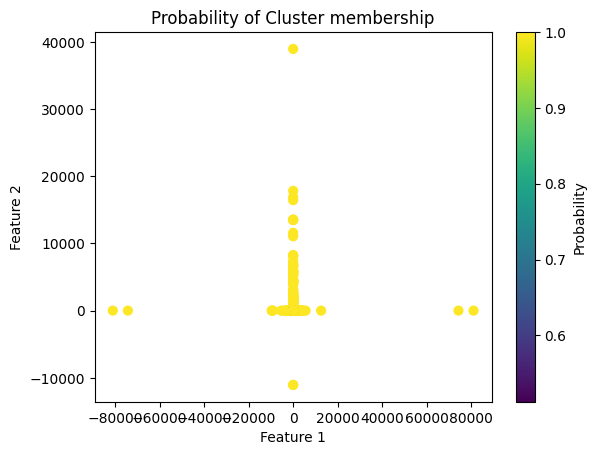

In [17]:
probs = gmm.predict_proba(df)
plt.scatter(df['Quantity'], df['UnitPrice'],  c=probs.max(axis=1), s = 40, cmap="viridis")
plt.title("Probability of Cluster membership")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Probability")
plt.show()

### 6. Hierarchical Clustering

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

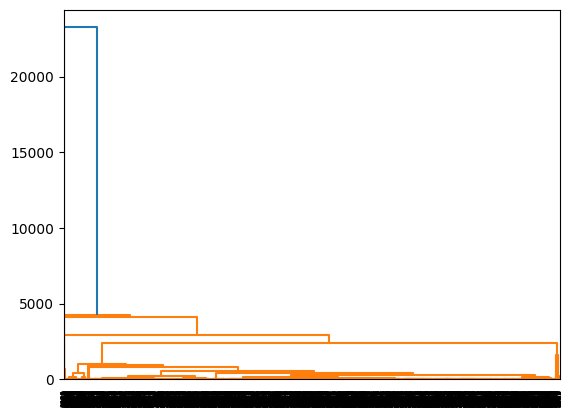

In [24]:
# Hierarchical Clustering 
sample_df=df.sample(n=5000)
Z = linkage(sample_df, 'ward')

# Plot the dendrogram
dendrogram(Z)
plt.show()

Data set is too large for hierarchical clustering- reduced the sample to 5,000. 
Q- how do you even interpret this dendogram?